## Load & Explore Data



In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from google.colab import files

# Step 1: Upload ZIP file
uploaded = files.upload()

# Get the uploaded file name
zip_path = list(uploaded.keys())[0]
print("Uploaded file:", zip_path)

# Step 2: Extract the CSV file from ZIP
extract_path = "/content/extracted"
os.makedirs(extract_path, exist_ok=True)  # Ensure the directory exists

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)  # Extract all contents

# Find the extracted CSV file (assuming the name is known)
csv_path = os.path.join(extract_path, "surv_variants.csv")

# Step 3: Load dataset
df = pd.read_csv(csv_path)

# Step 4: Display basic info
df.info()

# Show first few rows
df.head()


Saving archive.zip to archive (2).zip
Uploaded file: archive (2).zip
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         4113 non-null   object 
 1   first_seq       4113 non-null   object 
 2   num_seqs        4113 non-null   int64  
 3   last_seq        4113 non-null   object 
 4   variant         4113 non-null   object 
 5   censure_date    4113 non-null   object 
 6   duration        4113 non-null   int64  
 7   censored        4113 non-null   bool   
 8   mortality_rate  4113 non-null   float64
 9   total_cases     4113 non-null   float64
 10  total_deaths    4113 non-null   float64
 11  growth_rate     3585 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(5)
memory usage: 357.6+ KB


,Country,first_seq,num_seqs,last_seq,variant,censure_date,duration,censored,mortality_rate,total_cases,total_deaths,growth_rate
0,China,2019-10-22,3,2020-06-03,S.Q677,2020-06-21,225,True,0.052983,18259.460123,967.435583,16447.430706
1,USA,2020-03-03,26022,2021-11-19,S.Q677,2020-11-01,626,False,0.016111,256577.596234,4133.841031,84748.745876
2,Brazil,2020-03-09,1553,2021-11-12,S.Q677,2020-11-07,613,False,0.027846,101550.140466,2827.764288,42356.907426
3,Australia,2020-03-20,88,2021-11-14,S.Q677,2020-11-18,604,False,0.009905,1402.239579,13.889752,1227.122500
4,Sweden,2020-03-20,810,2021-11-19,S.Q677,2020-11-18,609,False,0.012711,1659.148728,21.089425,2521.042925


## Data Preprocessing (Handling Missing Values & Feature Selection)

In [6]:
# Check missing values
print(df.isnull().sum())

# Drop rows with missing target variable (growth_rate)
df = df.dropna(subset=['growth_rate'])

# Select relevant numerical features for regression
features = ['num_seqs', 'duration', 'mortality_rate', 'total_cases', 'total_deaths']
target = 'growth_rate'

# Extract X (features) and y (target)
X = df[features]
y = df[target]

# Display cleaned dataset info
X.info(), y.head()


Country             0
first_seq           0
num_seqs            0
last_seq            0
variant             0
censure_date        0
duration            0
censored            0
mortality_rate      0
total_cases         0
total_deaths        0
growth_rate       528
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 3585 entries, 0 to 4111
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   num_seqs        3585 non-null   int64  
 1   duration        3585 non-null   int64  
 2   mortality_rate  3585 non-null   float64
 3   total_cases     3585 non-null   float64
 4   total_deaths    3585 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 168.0 KB


(None,
 0    16447.430706
 1    84748.745876
 2    42356.907426
 3     1227.122500
 4     2521.042925
 Name: growth_rate, dtype: float64)

## Train-Test Split & Scaling

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features)

X_train_scaled.head()


,num_seqs,duration,mortality_rate,total_cases,total_deaths
0,-0.116092,-0.860773,-0.453409,-0.135916,-0.155565
1,-0.114261,0.492338,-0.643757,-0.045803,-0.098853
2,-0.092808,0.060359,-0.587624,-0.133049,-0.153687
3,-0.116044,-0.587610,0.711796,-0.136479,-0.155924
4,-0.115900,-0.485968,-0.755482,-0.136554,-0.156086


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['num_seqs'].plot(kind='hist', bins=20, title='num_seqs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['duration'].plot(kind='hist', bins=20, title='duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['mortality_rate'].plot(kind='hist', bins=20, title='mortality_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='num_seqs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='num_seqs', y='duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='duration', y='mortality_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='mortality_rate', y='total_cases', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['num_seqs']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('num_seqs')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['mortality_rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('mortality_rate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total_cases']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total_cases')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['num_seqs'].plot(kind='line', figsize=(8, 4), title='num_seqs')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['duration'].plot(kind='line', figsize=(8, 4), title='duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['mortality_rate'].plot(kind='line', figsize=(8, 4), title='mortality_rate')
plt.gca().spines[['top', 'right']].set_visible(False)

## Train Regression Model




In [8]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)


## Model Evaluation

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 15450.296716616955
Mean Squared Error (MSE): 1594983858.132667
Root Mean Squared Error (RMSE): 39937.24900556706
R² Score: 0.07438640515049122


## Visualizing Results

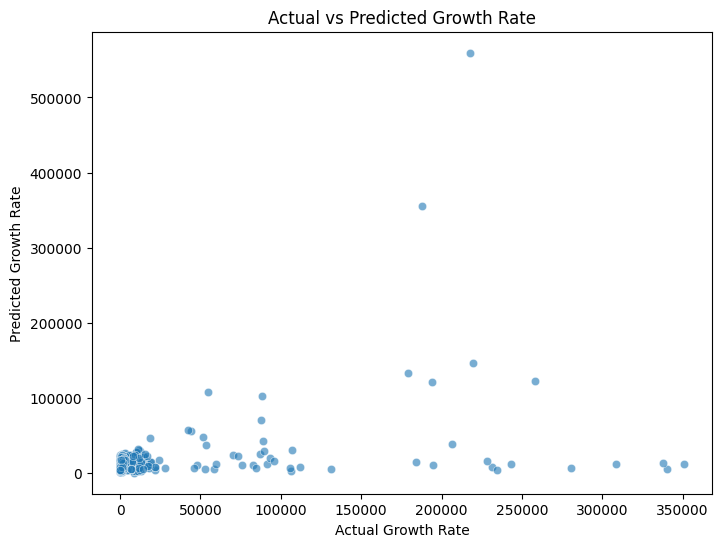

In [11]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Growth Rate")
plt.ylabel("Predicted Growth Rate")
plt.title("Actual vs Predicted Growth Rate")
plt.savefig("growth_rate_scatter.png", dpi=300, bbox_inches='tight')
plt.show()
